## Assignment 1.2: Stats and Visualization of the Rock Music Network

### Process Explanation

*[Describe your data collection process]*

**Steps:**
1. **[Your process step-by-step]**
    1. The process consisted of 3 overall parts: Finding all nodes, saving each of them, and then scraping them to create the network.
        1. We scraped the wiki-overview page to find all relevant nodes. This included converting their wiki names to actual URLS by converting e.g. spaces to underscores.
        2. We scraped each of the wiki-pages of the relevant nodes, found a viable file-name (a file cannot be called "AC/DC.txt"), and saved the contents of the wiki-page to a txt.file
        3. We loaded txt files, scraped them for links, kept links that mapped to the relevant nodes and added a directed edge between the node and its related nodes.
2. **[Most difficult parts]**
    1. Converting link names to relevant URLs and safe file names was the most difficult part. Symbols and letters outside of the ordinary alphabet created some issues, that needed mappings.
3. **[How LLMs helped]**
    1. Debugging, mapping for safe names, and downloading/loading files was what LLMs helped with the most.
4. **[What you'd do differently]**
    1. I would have worked more structured. Some frustration in the debugging process made me go back and make my code messy in some places, which I later had to correct.


### Simple Network Statistics and Analysis
*[Insert your network statistics]*

**Analysis includes:**
- **Number of nodes and links**
    - The largest component, which we are working with, contains 456 components out of the 488 original rock pages. Very few rock pages are not connected to the others, and some of them are probably due to issues with formatting URLs.  
    - It has 6985 links, so an average degree of 15.32.
- **In-degree and out-degree distributions**
    - The in-degree seems to almost follow a power-law distribution, though it is not completely linear. More famous rock-musicians inspire other bands and therefore get more referenced.  
    - The out-degree seems to follow a a poisson distribution, similar to a random network.
- **Comparison with random and scale-free networks**
    - The in-degree of the rock network is very similar to a scale-free network.
    - The out-degree of the rock network has a heavier tail than a random network, but they both follow a somewhat poisson distribution.
- **Top 5 most connected performers**
    - The most connected, so the performers with the highest in + out-degrees are Led Zeppelin, Queen, Black_Sabbath, Metallica, Bob_Dylan
        - As these are some of the most famous ones it both makes sense that many pages would reference them (in-degree) and that the content would be very thorough so they reference many pages (out-degree)
    - The 5 performers with the highest in-degrees are Led Zeppelin, Bob Dylan, Queen, David Bowie and Metallica
    - The 5 performers with the highest out-degrees are Alice in Chains, Deep Purple, Black Sabbath, Def Leppard, and Bryan Adams.

- **10 pages with longest wiki entries**
    - The longest pages are for Guns N Roses, Coldplay, Marilyn Manson, Queen, The Rolling Stones, U2, David Bowie, Paul McCartney, Bob Dylan, and Elton John.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import re
# import json
# import urllib
# import os
import networkx as nx

#nx.write_gexf(DG, "graphs/rock_bands_graph.gexf")
DG = nx.read_gexf("graphs/rock_bands_graph.gexf") ##Point to github directory

Number of nodes in the largest component: 456
Number of edges in the graph is: 6985
The Average degree is 15.317982456140351


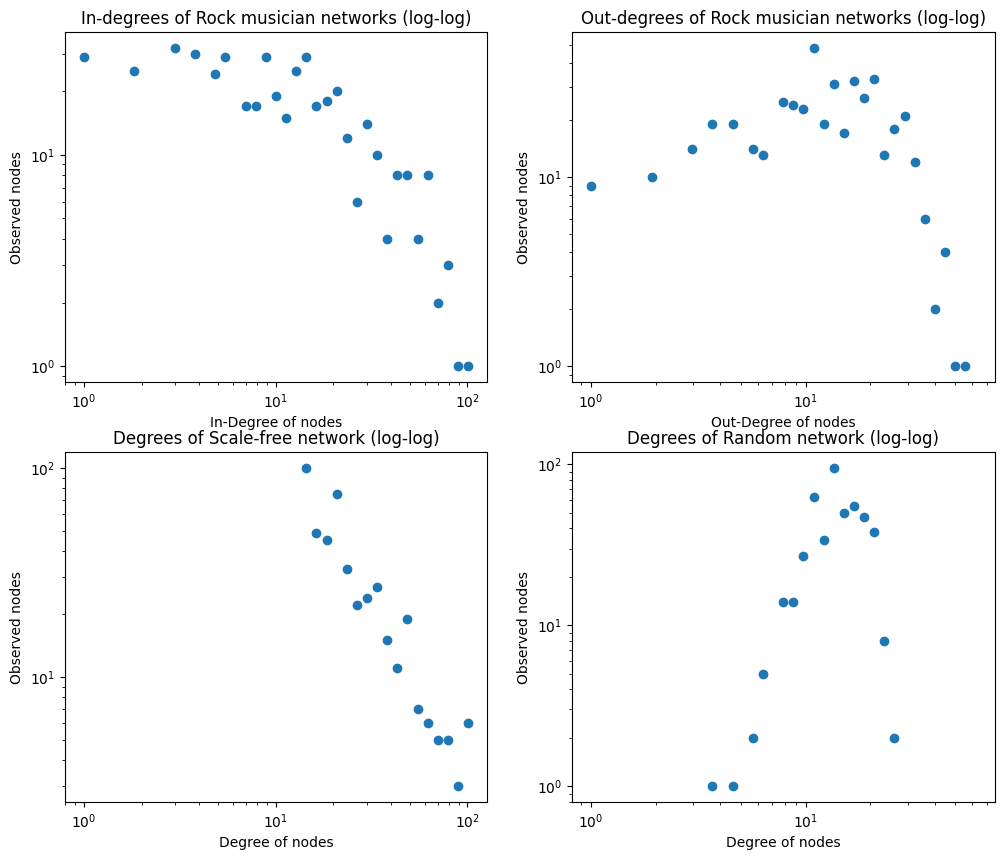

In [6]:
# Number of nodes in the network
print(f"Number of nodes in the largest component: {len(DG)}")

# What is the number of links?
print("Number of edges in the graph is: {}".format(DG.number_of_edges()))

# The average degree will then be
print("The Average degree is {}".format(DG.number_of_edges() / len(DG) ) ) 

#Get the degrees
in_degree_sequence = [d for _, d in DG.in_degree()]
out_degree_sequence = [d for _, d in DG.out_degree()]

in_bins = np.logspace(np.log10(1), np.log10(max(in_degree_sequence)), 40)
out_bins = np.logspace(np.log10(1), np.log10(max(out_degree_sequence)), 40)

figure, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.title("Some title")

in_hist_values, in_hist_edges = np.histogram(a = in_degree_sequence, bins = in_bins)
axs[0,0].scatter(in_hist_edges[:-1], in_hist_values)
axs[0,0].set_title("In-degrees of Rock musician networks (log-log)")
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel("In-Degree of nodes")
axs[0,0].set_ylabel("Observed nodes")

out_hist_values, out_hist_edges = np.histogram(a = out_degree_sequence, bins = out_bins)
axs[0,1].scatter(out_hist_edges[:-1], out_hist_values)
axs[0,1].set_title("Out-degrees of Rock musician networks (log-log)")
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel("Out-Degree of nodes")
axs[0,1].set_ylabel("Observed nodes")



########################### Compare
n = len(DG)
m = DG.number_of_edges()


################################################### Compare to scale-free network
BA = nx.barabasi_albert_graph(n, round(m/n))

# SFG = nx.scale_free_graph(n = len(DG))
BA_degree_sequence = [d for _, d in BA.degree()]
BA_hist_values, BA_hist_edges = np.histogram(a = BA_degree_sequence, bins = in_bins)
axs[1,0].scatter(BA_hist_edges[:-1], BA_hist_values)
axs[1,0].set_title("Degrees of Scale-free network (log-log)")
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel("Degree of nodes")
axs[1,0].set_ylabel("Observed nodes")



################################################### Compare to a random network
# RG = nx.gnm_random_graph(n = len(DG), m = DG.number_of_edges(), directed=True)
RN = nx.erdos_renyi_graph(n, m/(n*(n-1)))

#Get the degrees
RN_out_degree_sequence = [d for _, d in RN.degree()]
RN_out_hist_values, RG_out_hist_edges = np.histogram(a = RN_out_degree_sequence, bins = out_bins)
axs[1,1].scatter(RG_out_hist_edges[:-1], RN_out_hist_values)
axs[1,1].set_title("Degrees of Random network (log-log)")
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel("Degree of nodes")
axs[1,1].set_ylabel("Observed nodes")

plt.show()

In [3]:
total_degrees = {node: DG.in_degree(node) + DG.out_degree(node) for node in DG.nodes()}
total_degrees_sorted = sorted(
    total_degrees.items()
    , key=lambda x: x[1]
    , reverse=True)

out_sorted = sorted(
    list(DG.out_degree()),
    key=lambda x: x[1],
    reverse = True
)

in_sorted = sorted(
    list(DG.in_degree()),
    key=lambda x: x[1],
    reverse = True
)

content_lengths = {node: DG.nodes[node]['content_length'] for node in DG.nodes()}


content_sorted = sorted(
    content_lengths.items()
    , key=lambda x: x[1]
    , reverse=True)

print("The most connected nodes are: {}".format(total_degrees_sorted[0:5]))
print("The nodes with most outgoing links are: {}".format(out_sorted[0:5]))
print("The nodes with most ingoing links are: {}".format(in_sorted[0:5]))
print("The nodes with most content are: {}".format(content_sorted[0:10]))

The most connected nodes are: [('Led_Zeppelin', 142), ('Queen_(band)', 129), ('Black_Sabbath', 128), ('Metallica', 126), ('Bob_Dylan', 121)]
The nodes with most outgoing links are: [('Alice_in_Chains', 69), ('Deep_Purple', 69), ('Black_Sabbath', 59), ('Def_Leppard', 50), ('Bryan_Adams', 49)]
The nodes with most ingoing links are: [('Led_Zeppelin', 114), ('Bob_Dylan', 91), ('Queen_(band)', 85), ('David_Bowie', 82), ('Metallica', 81)]
The nodes with most content are: [("Guns_N'_Roses", 285898), ('Coldplay', 231121), ('Marilyn_Manson_(band)', 226405), ('Queen_(band)', 217384), ('The_Rolling_Stones', 208101), ('U2', 202254), ('David_Bowie', 200970), ('Paul_McCartney', 200578), ('Bob_Dylan', 199759), ('Elton_John', 196974)]


### Network Visualization

*[Insert your network visualization]*

**Visualization features:**
- Undirected network representation
- Node size proportional to degree
- Color mapping based on content length
- Force-directed layout algorithm

---

Text(0.5, 1.0, 'Rock performers network (node size = Degree, Color = Article Lenght). Kamada Kawai layout')

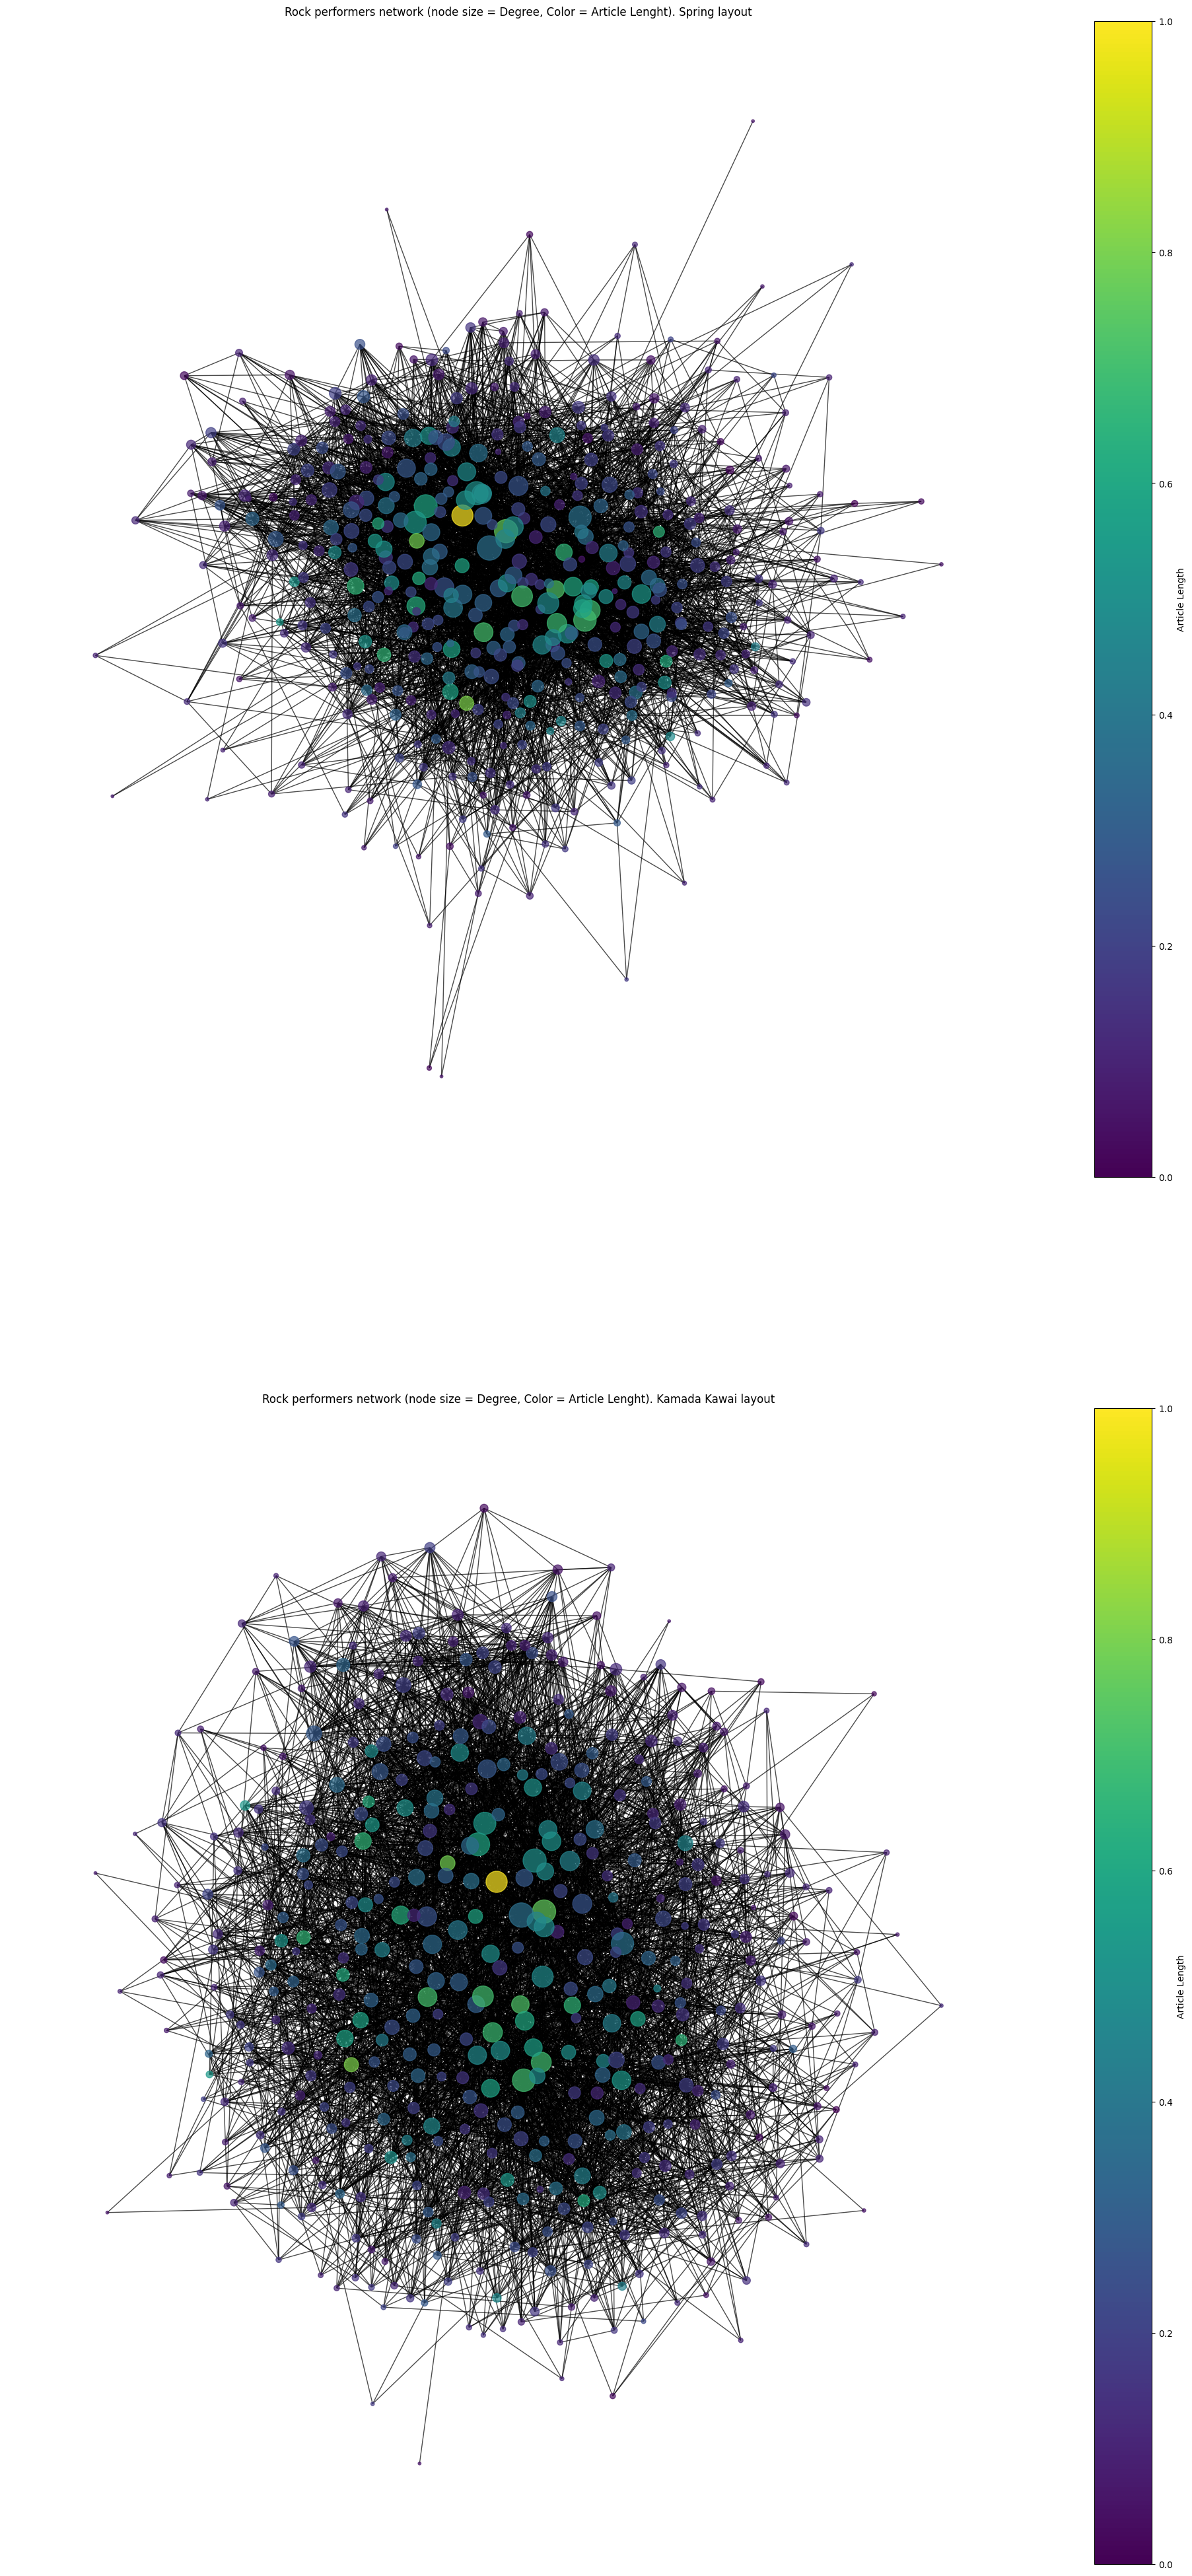

In [4]:
G = DG.to_undirected()

node_sizes = [total_degrees[node]*5 for node in G.nodes()]
max_content = content_sorted[0][1]


node_colors = [content_lengths[node]/max_content for node in G.nodes()]

figure, axs = plt.subplots(2, 1, figsize=(25, 50))

spring_pos = nx.spring_layout(G)
nx.draw(G, pos = spring_pos, node_size = node_sizes, node_color = node_colors, ax = axs[0], alpha = 0.7, cmap=plt.cm.viridis)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Article Length', ax=axs[0])
axs[0].set_title("Rock performers network (node size = Degree, Color = Article Lenght). Spring layout")

kamada_kawai_pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos = kamada_kawai_pos, node_size = node_sizes, node_color = node_colors, ax = axs[1], alpha = 0.7, cmap=plt.cm.viridis)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Article Length', ax=axs[1])
axs[1].set_title("Rock performers network (node size = Degree, Color = Article Lenght). Kamada Kawai layout")
